#Import all the necessary libraries

In [186]:
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

# Library used for data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Import dataset

In [187]:
df = pd.read_csv("https://raw.githubusercontent.com/HiYasin/flower_species_classification/main/Iris_flowers.csv")

# View data & info

## Display data and info

In [188]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Check duplicate values

In [190]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


## Check missing values

In [191]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


## Columns overview

In [192]:
df.describe(include= 'all').round(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000,150.000,150.000,150.000,150.000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500,5.843,3.054,3.759,1.199,NaN
std,43.445,0.828,0.434,1.764,0.763,NaN
min,1.000,4.300,2.000,1.000,0.100,NaN
25%,38.250,5.100,2.800,1.600,0.300,NaN
50%,75.500,5.800,3.000,4.350,1.300,NaN
75%,112.750,6.400,3.300,5.100,1.800,NaN


In [193]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Dataset overview

- The dataset consists of length and width mesurements of sepal and petal for different species in centimeter.
- There are 150 rows and 6 columns provided in the data.
- No duplicate and no Null values exist.

# Data Preprocessing

## Drop unnecessary column

In [194]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [195]:
data = data=df.iloc[:,1:]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Categorical encoding

In [196]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.Categorical(data[col]).codes

In [197]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [198]:
unique_species = data['Species'].unique()
print("Encoded Species Values:", unique_species)
# 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values: [0 1 2]


## Data scaling and splitting

In [199]:
# Scaling data
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

In [200]:
# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

# Implementation

In [201]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [202]:
x.shape
x_train.shape[1]

4

In [203]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [204]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

In [205]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [206]:
cb = ModelCheckpoint('iris_flower.keras', monitor='val_accuracy', verbose=1, save_best_only=True)

In [207]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [208]:
h = model.fit(x_train, y_train, validation_split=.1, epochs=10, callbacks=[cb])

Epoch 1/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step - accuracy: 0.3750 - loss: 1.0305
Epoch 1: val_accuracy improved from -inf to 0.81818, saving model to iris_flower.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.3659 - loss: 1.1069 - val_accuracy: 0.8182 - val_loss: 0.8189
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6875 - loss: 1.0730
Epoch 2: val_accuracy did not improve from 0.81818
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6696 - loss: 1.0670 - val_accuracy: 0.8182 - val_loss: 0.8474
Epoch 3/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5938 - loss: 1.0354
Epoch 3: val_accuracy did not improve from 0.81818
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5923 - loss: 1.0256 - val_accuracy: 0.8182 - val_loss: 0.8800
Epoch 4/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5625 - loss: 0.9849
Epoch 4: val_accuracy did not improve from 0.81818
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5632 - loss: 0.9693 - val_accura

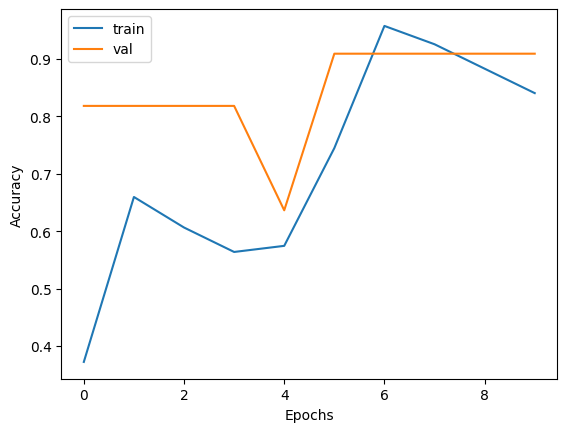

In [209]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

In [210]:
import tensorflow as tf
bm = tf.keras.models.load_model('iris_flower.keras') # highest accuracy value

In [211]:
y_pred = bm.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [212]:
y_pred

array([[0.20768343, 0.31526947, 0.47704697],
       [0.27151132, 0.38686714, 0.34162155],
       [0.2405059 , 0.3427842 , 0.4167099 ],
       [0.3014143 , 0.39428693, 0.3042988 ],
       [0.2830045 , 0.40755525, 0.3094403 ],
       [0.42078966, 0.4091385 , 0.17007181],
       [0.42597073, 0.4095579 , 0.16447133],
       [0.19976398, 0.3914143 , 0.40882182],
       [0.22446138, 0.36016953, 0.41536903],
       [0.42101467, 0.40469813, 0.17428719],
       [0.2151481 , 0.35977185, 0.42508003],
       [0.42194384, 0.41146365, 0.16659242],
       [0.32345504, 0.39533946, 0.2812055 ],
       [0.20443676, 0.36560792, 0.42995533],
       [0.40606454, 0.41162118, 0.18231437],
       [0.2623802 , 0.38108045, 0.35653937],
       [0.26139095, 0.41788575, 0.32072324],
       [0.19320108, 0.38044265, 0.4263563 ],
       [0.42323992, 0.408082  , 0.168678  ],
       [0.19656765, 0.34326595, 0.46016645],
       [0.24672043, 0.3893262 , 0.36395335],
       [0.28403166, 0.40008718, 0.31588113],
       [0.

In [215]:
y_pred_n = np.argmax(y_pred, axis=1).astype('int')

In [216]:
unique_elements, counts = np.unique(y_pred_n, return_counts=True)
print("Predicted Class Counts:")
for element, count in zip(unique_elements, counts):
    print(f"Class {element}: {count}")

Predicted Class Counts:
Class 0: 12
Class 1: 17
Class 2: 16


In [217]:
accuracy_score(y_test, y_pred_n)

0.9333333333333333

<Axes: >

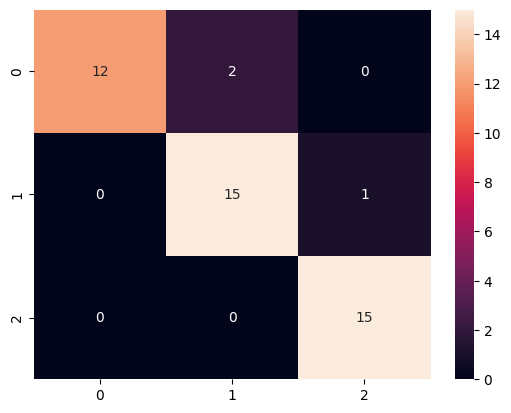

In [218]:
sns.heatmap(confusion_matrix(y_test, y_pred_n), annot=True, fmt='g')

In [219]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Train the model
mlp_model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

Accuracy of MLPClassifier: 0.9555555555555556


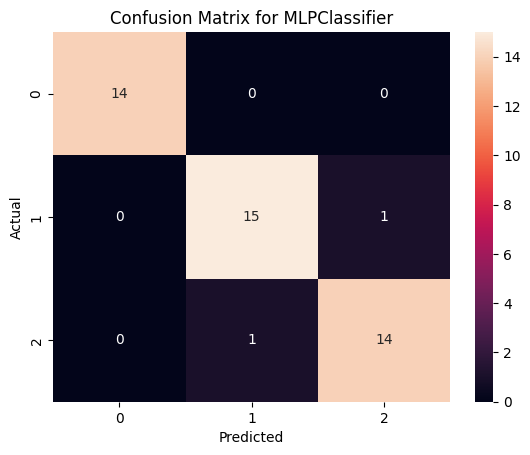

In [220]:
# Make predictions on the test set
y_pred_mlp = mlp_model.predict(x_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy of MLPClassifier: {accuracy_mlp}")

# Display confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='g')
plt.title('Confusion Matrix for MLPClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()